**5.1** Calculate mean daily return and daily standard deviation, and annualize them to obtain expected annual return and volatility.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pvr = pd.read_csv('data/Small_Cap/PVR.csv')
pvr = pvr[pvr['Series']=='EQ']
pvr['DailyReturn'] = pvr['Close Price'].pct_change().fillna(0)   # daily returns, daily percentage change (multiply by 100 for result in %)

dailyMeanPVR = pvr['DailyReturn'].mean()
dailyStDevPVR = pvr['DailyReturn'].std()

annualMeanPVR = dailyMeanPVR*252
annualStdDevPVR = dailyStDevPVR*np.sqrt(252)

print('Mean Expected Annual Return % :',annualMeanPVR*100,'    Annual Volatility % :',annualStdDevPVR*100)

Mean Expected Annual Return % : 11.086480124052587     Annual Volatility % : 30.98835041377322


**5.2** Choose 5 stocks. Assuming they have same weights, calculate annual return and volatility.

In [105]:
axis = pd.read_csv('data/Large_Cap/AXISBANK.csv')
axis = axis[axis['Series']=='EQ']
apollo = pd.read_csv('data/Mid_Cap/APOLLOTYRE.csv')
apollo = apollo[apollo['Series']=='EQ']
relinfra = pd.read_csv('data/Mid_Cap/RELINFRA.csv')
relinfra = relinfra[relinfra['Series']=='EQ']
fortis = pd.read_csv('data/Small_Cap/FORTIS.csv')
fortis = fortis[fortis['Series']=='EQ']

dailyReturn = pd.DataFrame({'axis':axis['Close Price'].pct_change(),'apollo':apollo['Close Price'].pct_change(),'relinfra':relinfra['Close Price'].pct_change(),'fortis':fortis['Close Price'].pct_change(),'pvr':pvr['DailyReturn']})
dailyReturn.dropna()

# weights = pd.Series({'axis':0.2, 'apollo':0.2, 'relinfra':0.2, 'fortis':0.2, 'pvr':0.2})    # weights
annualReturn = dailyReturn.mean()*252   # contains annual returns of the five stocks
annualVar = dailyReturn.var()*252   # contains annual variance of the stocks
annualSD = dailyReturn.std()*np.sqrt(252)   # contains annual standard deviation of the stocks
covMat = dailyReturn.cov()    # covariance between two stocks
covUMat = np.triu(np.array(covMat))

portfolioReturn = annualReturn.mean()   # since all are of equal weights, hence the mean. multiply by 100 for result in %

# since the weights are equal(0.2), multiply by 100 for result in %
portfolioVolatility = annualVar.sum()*0.04 + 2*0.04*(covUMat.sum() - np.diag(covUMat).sum())

print('Returns % :',portfolioReturn*100,'     Volatility % :',portfolioVolatility*100)

Returns % : -12.326133988170877      Volatility % : 2.993186269335036


**5.3** Prepare a scatter plot on the basis of different weights for the stocks of the portfolio. Color the data points based on the sharpe ratio.

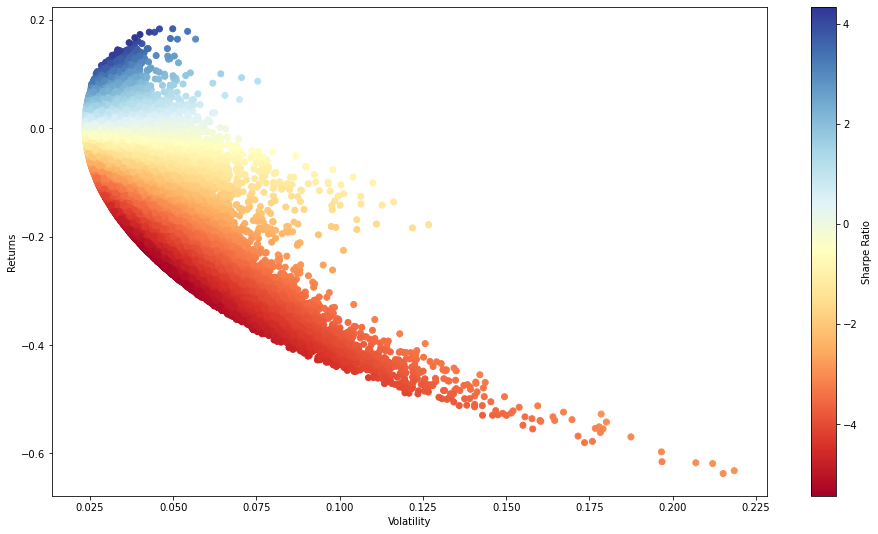

In [123]:
weights = pd.DataFrame({'axis':np.random.random_sample(100000),'apollo':np.random.random_sample(100000),'relinfra':np.random.random_sample(100000),'fortis':np.random.random_sample(100000),'pvr':np.random.random_sample(100000)})
weights['addAll'] = weights.sum(axis=1)

# there has to be an easier way to do this
weights['axis']=weights['axis']/weights['addAll']
weights['apollo']=weights['apollo']/weights['addAll']
weights['relinfra']=weights['relinfra']/weights['addAll']
weights['fortis']=weights['fortis']/weights['addAll']
weights['pvr']=weights['pvr']/weights['addAll']

weights['addAll'] = weights[['axis','apollo','relinfra','fortis','pvr']].sum(axis=1)    # to verify whether they add upto 1

portfolio = pd.DataFrame({'return':weights['axis']*annualReturn['axis'] + weights['apollo']*annualReturn['apollo'] + weights['relinfra']*annualReturn['relinfra'] + weights['fortis']*annualReturn['fortis'] + weights['pvr']*annualReturn['pvr']})
portfolio['volatility'] = (weights['axis']**2)*annualVar['axis'] + (weights['apollo']**2)*annualVar['apollo'] + (weights['relinfra']**2)*annualVar['relinfra'] + (weights['fortis']**2)*annualVar['fortis'] + (weights['pvr']**2)*annualVar['pvr'] + 2*weights['axis']*weights['apollo']*covMat['axis']['apollo'] + 2*weights['axis']*weights['relinfra']*covMat['axis']['relinfra'] + 2*weights['axis']*weights['fortis']*covMat['axis']['fortis'] + 2*weights['axis']*weights['pvr']*covMat['axis']['pvr'] + 2*weights['apollo']*weights['relinfra']*covMat['apollo']['relinfra'] + 2*weights['apollo']*weights['fortis']*covMat['apollo']['fortis'] + 2*weights['apollo']*weights['pvr']*covMat['apollo']['pvr'] + 2*weights['relinfra']*weights['fortis']*covMat['relinfra']['fortis'] + 2*weights['relinfra']*weights['pvr']*covMat['relinfra']['pvr'] + 2*weights['fortis']*weights['pvr']*covMat['fortis']['pvr']

portfolio['sharpe'] = portfolio['return']/portfolio['volatility']   # created a column for sharpe ratio
plt.figure(figsize=(16,9))
plt.scatter(portfolio['volatility'],portfolio['return'],c=portfolio['sharpe'],cmap='RdYlBu')
cbar = plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
cbar.set_label('Sharpe Ratio')
plt.show()

**5.4** Mark the two portfolios where :
* Sharpe Ratio is the highest
* Volatility is the lowest

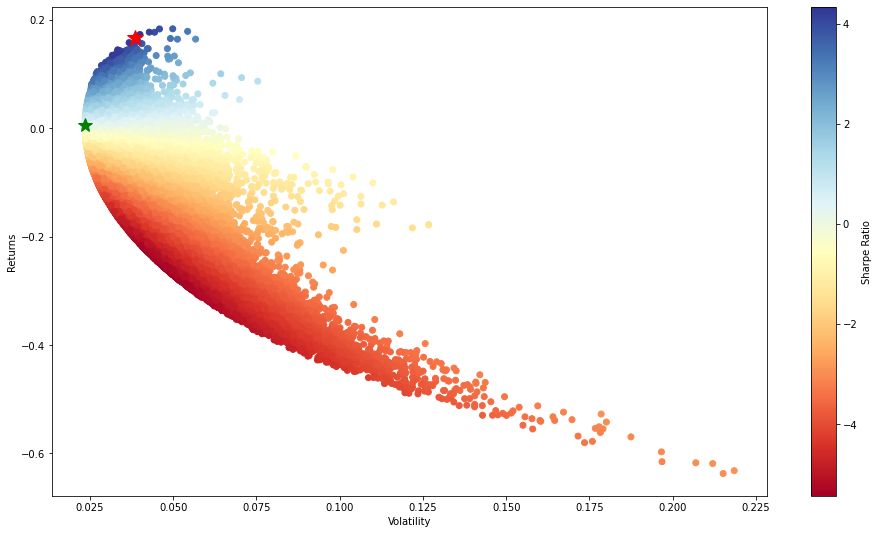

In [127]:
maxSharpe = portfolio[portfolio['sharpe'] == portfolio['sharpe'].max()]
minVolatility = portfolio[portfolio['volatility'] == portfolio['volatility'].min()]

plt.figure(figsize=(16,9))
plt.scatter(portfolio['volatility'],portfolio['return'],c=portfolio['sharpe'],cmap='RdYlBu')
plt.plot(maxSharpe['volatility'],maxSharpe['return'],'r*',ms=17)
plt.plot(minVolatility['volatility'],minVolatility['return'],'g*',ms=14)    # ms is marker size
cbar = plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
cbar.set_label('Sharpe Ratio')
plt.show()